# Detecção de Intrusões em Redes Usando Random Forest


## Metodologia

O dataset escolhido foi retirado da plataforma Kaggle:  
> [Network Intrusion Detection Dataset](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection)

O conjunto contém registros de tráfego de rede rotulados como normal ou pertencentes a diferentes tipos de ataques.

As etapas metodológicas incluem:

- Carregamento e visualização dos dados
- Limpeza e pré-processamento
- Treinamento do modelo
- Avaliação usando métricas padrão
    

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [19]:
# 4.2 Carregamento do dataset
df = pd.read_csv("Train_data.csv")

# Visualização inicial
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [20]:
# Código simplificado
# Colunas categóricas nominais
colunas_categoricas = ['protocol_type', 'flag', 'service']

# Dicionário para armazenar os encoders caso precise inverter depois
encoders = {}

for coluna in colunas_categoricas:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    encoders[coluna] = le  # Guarda o encoder para possível inversão futura

# Verifica se cada valor é string (ou seja, não numérico)
nao_numericos_por_coluna = df.applymap(lambda x: isinstance(x, str)).sum()

# Renomeando para Label para evitar confusão
df.rename(columns={'class': 'Label'}, inplace=True)

# Codificar a coluna alvo
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

    

/tmp/ipykernel_7894/27778552.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nao_numericos_por_coluna = df.applymap(lambda x: isinstance(x, str)).sum()


In [21]:
# Código simplificado
# Separar atributos e rótulo
df = df.drop(columns=["src_bytes"])
X = df.drop('Label', axis=1)
y = df['Label']

# Dividir em treino e teste (random_state para reprodutibilidade)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
# 4.4 Treinamento do modelo
model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)
    


##  Resultados e Discussão

O modelo Random Forest apresentou um desempenho excelente na classificação do dataset, alcançando uma acurácia de 96,67%. As métricas de precisão, recall e F1-score para ambas as classes se aproximaram do valor máximo, indicando que o classificador foi capaz de identificar corretamente tanto conexões normais quanto ataques, mantendo um equilíbrio eficiente entre falsos positivos e falsos negativos. O conjunto de dados utilizado mostrou-se balanceado, com suporte semelhante para as duas classes, o que contribui para a confiabilidade da avaliação do modelo.

Além disso, a análise da importância das features revelou que variáveis relacionadas ao volume de dados transmitidos, como src_bytes e dst_bytes, juntamente com taxas de serviços específicas, são as principais responsáveis pelas decisões do modelo. Muitas outras variáveis apresentaram importância mínima, sugerindo que poderiam ser removidas para simplificar o modelo sem prejudicar seu desempenho. Essa avaliação estatística oferece uma base sólida para futuras otimizações e melhor compreensão do comportamento do classificador.

In [23]:
# Acurácia geral
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.4f}\n")

# Relatório detalhado
# print("Relatório de Classificação:")
# print(classification_report(y_test, y_pred))

Acurácia: 0.9630



In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Acurácia geral
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.10f}\n")

# Relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9629531622

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3523
           1       0.94      0.99      0.97      4035

    accuracy                           0.96      7558
   macro avg       0.97      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558



=== Desempenho do Modelo ===
Acurácia: 0.9630
Precisão: 0.9640
Recall: 0.9630
F1-Score: 0.9629


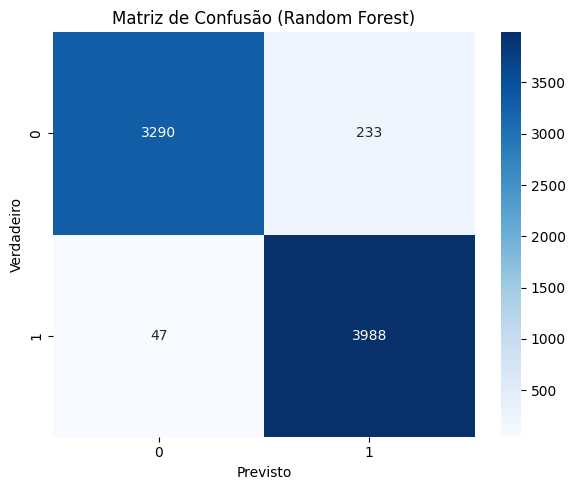

In [24]:
# --- Cálculo das métricas ---
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted', zero_division=0)
revocacao = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metricas = {
    'Acurácia': acuracia,
    'Precisão': precisao,
    'Recall': revocacao,
    'F1-Score': f1
}

print("=== Desempenho do Modelo ===")
for nome, valor in metricas.items():
    print(f"{nome}: {valor:.4f}")


# --- Matriz de confusão ---
cm = confusion_matrix(y_test, y_pred,)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão (Random Forest)")
plt.tight_layout()
plt.show()


Importância das Features:
dst_bytes                      0.210027
same_srv_rate                  0.119865
flag                           0.112204
diff_srv_rate                  0.092858
dst_host_same_srv_rate         0.071372
dst_host_srv_count             0.052191
count                          0.045294
dst_host_srv_serror_rate       0.038849
dst_host_same_src_port_rate    0.037666
logged_in                      0.035844
protocol_type                  0.029970
dst_host_diff_srv_rate         0.023663
srv_serror_rate                0.021815
dst_host_serror_rate           0.014569
dst_host_srv_diff_host_rate    0.013467
dst_host_count                 0.013371
service                        0.011940
dst_host_srv_rerror_rate       0.010955
serror_rate                    0.009567
rerror_rate                    0.007632
dst_host_rerror_rate           0.007581
srv_count                      0.006119
hot                            0.004097
num_compromised                0.002767
srv_rerror_rat

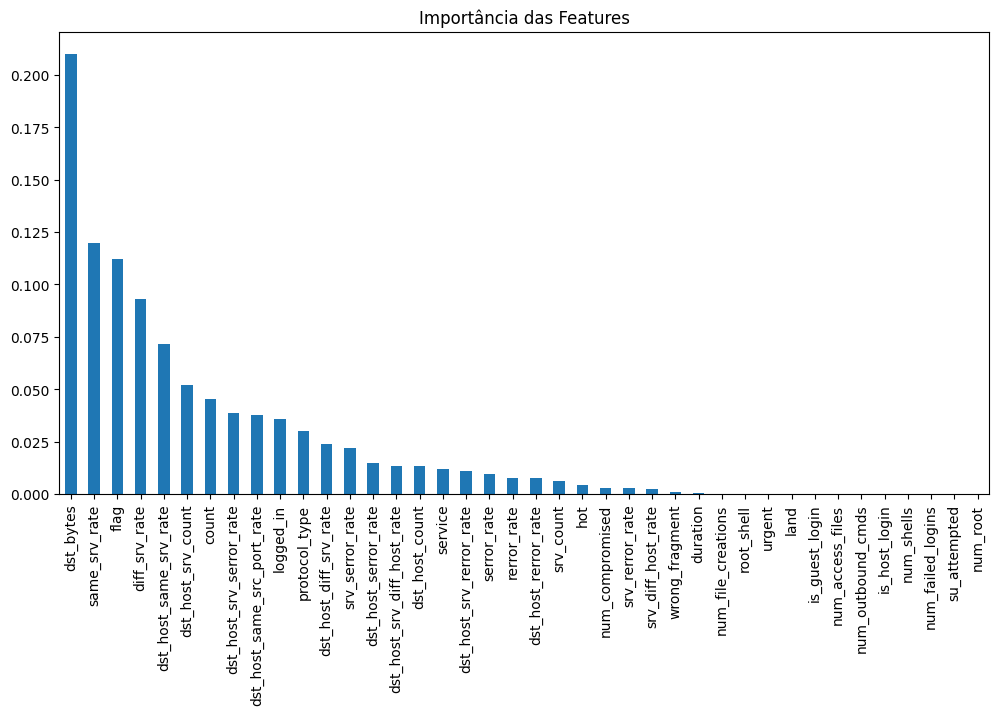

In [25]:

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Importância das Features:")
print(importances)

plt.figure(figsize=(12,6))
importances.plot(kind='bar')
plt.title("Importância das Features")
plt.show()


##  Conclusão

O uso do Random Forest para classificação em cibersegurança mostrou-se bastante promissor para a previsão de ataques reais em redes de computadores. O modelo não apenas demonstra alta precisão, como também oferece insights importantes sobre quais características do tráfego de rede são mais indicativas de atividades maliciosas. Esses conhecimentos podem ser aplicados para fortalecer sistemas de detecção de intrusões, permitindo respostas mais rápidas e eficazes contra ameaças cibernéticas. Dessa forma, o estudo reforça a importância do machine learning como uma ferramenta estratégica para proteger ambientes digitais em um cenário de crescentes riscos de segurança.